In [1]:
import os
import pandas as pd
import numpy as np

os.chdir(r"C:\Users\pader\OneDrive\Desktop\Python\Home Credit Default Risk")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("application_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
cols = [i for i in df.columns] 
print(cols)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [5]:
# Dropping Unnecessary Columns

cols_to_drop = [
    'SK_ID_CURR', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
    'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'
] + [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)] + [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

df_cleaned = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df_cleaned.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Finding Missing Values

missing_values = df_cleaned.isna().sum().sort_values(ascending=False)
print(missing_values[missing_values>0])


COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_MEDI       

In [7]:
df_cleaned.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463,12.063419,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,0.509034,3.265832,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.12

array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>],
       [<Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'REG_REGION_NOT_WORK_REGION'}>],
       [<Axes: title={'center': 'LIVE_REGION_NOT_WORK_REGION'}>,
        <Axes: title={'center': 'REG_CITY_NOT_LIVE_CITY'}>,
        <Axes: ti

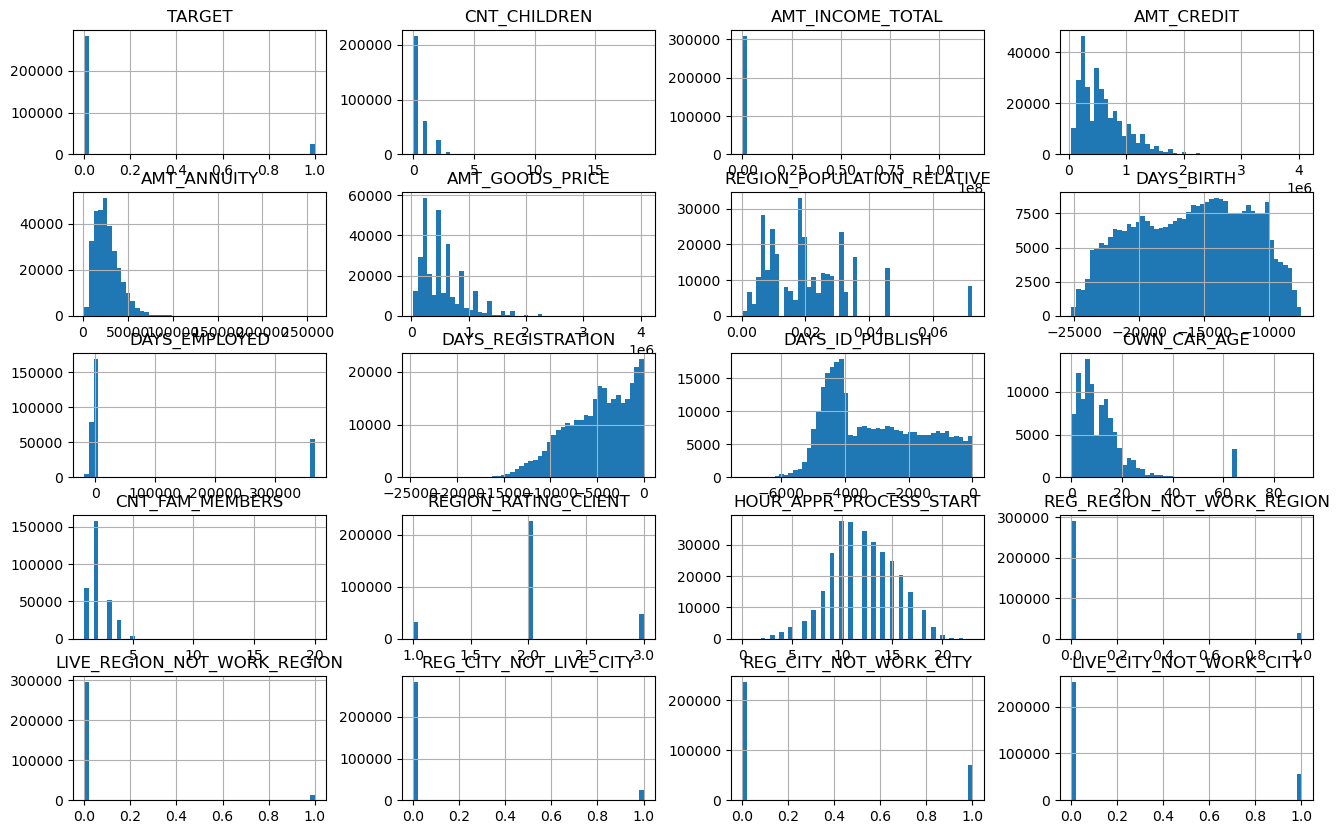

In [8]:
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_cols[:20]].hist(bins=50, figsize=(16,10))

In [9]:
for i in df_cleaned.columns:
    print(df_cleaned[i].value_counts().sort_values(ascending=False), '\n')

TARGET
0    282686
1     24825
Name: count, dtype: int64 

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64 

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64 

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64 

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64 

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64 

AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
155790.0        1
186151.5        1
231075.0        1
107284.5        1
113062.5        1
Name: count, Length: 2548, dtype: int64 

AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
513693.0       

In [10]:
# Cleaning Data

print("Initial shape:", df_cleaned.shape)


Initial shape: (307511, 82)


In [11]:

# Identify columns with >30% missing values
missing_percent = df_cleaned.isnull().mean()
len([i for i in missing_percent if i > 0])
    
high_missing_cols = missing_percent[missing_percent > 0.3].index.tolist()

df_cleaned.drop(columns=high_missing_cols, inplace=True)
print("Shape after dropping high-missing columns:", df_cleaned.shape)

Shape after dropping high-missing columns: (307511, 32)


In [12]:
# Separate numerical and categorical columns
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

missing_values = df_cleaned.isna().sum().sort_values(ascending=False)
print(missing_values[missing_values>0])

EXT_SOURCE_3       60965
NAME_TYPE_SUITE     1292
EXT_SOURCE_2         660
AMT_GOODS_PRICE      278
AMT_ANNUITY           12
CNT_FAM_MEMBERS        2
dtype: int64


In [13]:
df_cleaned[cat_cols].isna().sum()

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [14]:
df_cleaned['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [15]:
df_cleaned['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [16]:
for col in num_cols:
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)

for col in cat_cols:
    # Mode imputation
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].fillna(mode_val)

df_cleaned.isna().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE

In [17]:
# Outiers

financial_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

for feature in financial_features:
    if feature in df_cleaned.columns:
        q05 = df_cleaned[feature].quantile(0.05)
        q95 = df_cleaned[feature].quantile(0.95)

        df_cleaned[feature] = np.where(df_cleaned[feature] < q05, q05, np.where(
            df_cleaned[feature] < q95, q95, df_cleaned[feature]
        ))

In [18]:
# Feature Engineering

df_cleaned['INCOME_CREDIT_RATIO'] = df_cleaned["AMT_INCOME_TOTAL"]/df_cleaned["AMT_CREDIT"]
df_cleaned["ANNUITY_INCOME_RATIO"] = df_cleaned["AMT_ANNUITY"]/df_cleaned["AMT_INCOME_TOTAL"]

df_cleaned['AGE'] = round(abs(df_cleaned['DAYS_BIRTH'])/365)
df_cleaned['EMPLOYMENT_YEARS'] = round(abs(df_cleaned['DAYS_EMPLOYED'])/365,1)

df_cleaned["CAR_OWNER"] = (df_cleaned['FLAG_OWN_CAR']=='Y').astype(int)
df_cleaned["REALTY_OWNER"] = (df_cleaned['FLAG_OWN_REALTY']=='Y').astype(int)

df_cleaned['HIGH_DEBT_BURDEN'] = (df_cleaned['INCOME_CREDIT_RATIO'] > 0.5).astype(int)

df_cleaned['LONG_EMPLOYMENT'] = (df_cleaned['EMPLOYMENT_YEARS'] > 5).astype(int)
df_cleaned['RETIRED'] = (df_cleaned['AGE'] > 65).astype(int)

In [19]:
# Define risk segments
df_cleaned['RISK_SEGMENT'] = 'Medium'

# High-risk criteria
high_risk_mask = (
    (df_cleaned['INCOME_CREDIT_RATIO'] > 0.5) |
    (df_cleaned['AGE'] < 25) |
    (df_cleaned['NAME_INCOME_TYPE'] == 'Unemployed') |
    (df_cleaned['NAME_FAMILY_STATUS'].isin(['Single / not married', 'Civil marriage'])) |
    (df_cleaned['EXT_SOURCE_3'] < 0.3)
)
df_cleaned.loc[high_risk_mask, 'RISK_SEGMENT'] = 'High'

# Low-risk criteria
low_risk_mask = (
    (df_cleaned['EXT_SOURCE_3'] > 0.7) & 
    (df_cleaned['AGE'] > 35) & 
    (df_cleaned['INCOME_CREDIT_RATIO'] < 0.3) &
    (df_cleaned['NAME_CONTRACT_TYPE'] == 'Revolving loans')
)
df_cleaned.loc[low_risk_mask, 'RISK_SEGMENT'] = 'Low'

# FIXED AGGREGATION 
risk_segment_analysis = df_cleaned.groupby('RISK_SEGMENT')['TARGET'].agg(
    ['count', 'mean']
).reset_index()
risk_segment_analysis.columns = ['RISK_SEGMENT', 'count', 'default_rate']

# Format default rate as percentage
risk_segment_analysis['default_rate_pct'] = (risk_segment_analysis['default_rate'] * 100).round(1)
print(risk_segment_analysis)

  RISK_SEGMENT   count  default_rate  default_rate_pct
0         High  113853      0.114138              11.4
1          Low    3118      0.016998               1.7
2       Medium  190540      0.061809               6.2


In [20]:
risk_default = risk_segment_analysis.copy()
risk_default['default_rate'] = risk_default['default_rate'].apply(lambda x: f"{x:.1%}")
print(risk_default)

  RISK_SEGMENT   count default_rate  default_rate_pct
0         High  113853        11.4%              11.4
1          Low    3118         1.7%               1.7
2       Medium  190540         6.2%               6.2


In [21]:
# Create age bins
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=age_bins, labels=age_labels)

age_risk = df_cleaned.groupby('AGE_GROUP')['TARGET'] \
    .mean() \
    .reset_index(name='default_rate')
    
age_risk['default_rate'] = age_risk['default_rate'].apply(lambda x: f"{x:.1%}")
print(age_risk)

  AGE_GROUP default_rate
0     20-29        11.4%
1     30-39         9.4%
2     40-49         7.6%
3     50-59         6.0%
4       60+         4.9%


C:\Users\pader\AppData\Local\Temp\ipykernel_11768\3350930220.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df_cleaned.groupby('AGE_GROUP')['TARGET'] \


In [22]:
debt_risk = df_cleaned.groupby('HIGH_DEBT_BURDEN')['TARGET'] \
    .agg(['count', 'mean']) \
    .rename(columns={'mean': 'default_rate'})
    
debt_risk['default_rate'] = debt_risk['default_rate'].apply(lambda x: f"{x:.1%}")
print(debt_risk)

                   count default_rate
HIGH_DEBT_BURDEN                     
0                 296851         8.1%
1                  10660         6.0%


In [23]:
# Prepare data for dashboard
dashboard_data = pd.DataFrame({
    'RISK_SEGMENT': risk_default['RISK_SEGMENT'],
    'Default Rate': risk_default['default_rate'],
    'Count': risk_default['count']
})

dashboard_data = pd.concat([
    dashboard_data,
    pd.DataFrame({
        'Risk Group': ['Debt Burden >50%', 'Age <25'],
        'Default Rate': [
            debt_risk.loc[1, 'default_rate'],
            age_risk[age_risk['AGE_GROUP'] == '20-29']['default_rate'].values[0]
        ],
        'Count': [
            debt_risk.loc[1, 'count'],
            df_cleaned[df_cleaned['AGE'] < 25].shape[0]
        ]
    }) 
])

dashboard_data.to_csv('risk_dashboard_data.csv', index=False)

In [24]:
df_cleaned['EMPLOYMENT_YEARS'].value_counts()

EMPLOYMENT_YEARS
1000.7    55374
0.6        4540
0.5        3978
0.4        3656
0.7        3633
          ...  
45.1          1
43.6          1
43.3          1
45.3          1
45.4          1
Name: count, Length: 465, dtype: int64

In [25]:
df["NAME_INCOME_TYPE"][df['DAYS_EMPLOYED']==365243].value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

In [26]:
df[df["NAME_INCOME_TYPE"]=='Unemployed'][df['DAYS_EMPLOYED']==365243]

C:\Users\pader\AppData\Local\Temp\ipykernel_11768\1420109661.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["NAME_INCOME_TYPE"]=='Unemployed'][df['DAYS_EMPLOYED']==365243]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,-13964,365243,-115.0,-4746,NaN,1,0,0,1,0,0,NaN,1.0,3,3,FRIDAY,5,0,0,0,0,0,0,XNA,NaN,0.105875,0.824595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-325.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,-15947,365243,-4219.0,-4212,NaN,1,0,0,1,0,0,NaN,3.0,3,2,MONDAY,11,0,0,0,0,0,0,XNA,0.106761,0.617056,0.420611,0.0412,0.0387,0.9786,0.7076,0.0161,0.00,0.0690,0.1667,0.2083,0.0349,0.0319,0.0316,0.0077,0.0071,0.0420,0.0402,0.9786,0.7190,0.0162,0.0000,0.0690,0.1667,0.2083,0.0357,0.0349,0.0329,0.0078,0.0075,0.0416,0.0387,0.9786,0.7115,0.0162,0.00,0.0690,0.1667,0.2083,0.0355,0.0325,0.0321,0.0078,0.0072,reg oper account,block of flats,0.0351,Panel,No,2.0,0.0,2.0,0.0,-49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,-23692,365243,-5661.0,-4715,NaN,1,0,0,1,0,0,NaN,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,NaN,0.006939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
35352,140949,0,Cash loans,F,N,N,

In [28]:
# Rule: Employment years can't exceed (Age - 18) 
# (Assuming 18 is minimum working age)
df_cleaned['MAX_PLAUSIBLE_EMPLOYMENT'] = df_cleaned['AGE'] - 18

# For retirees, allow longer history (adjust if needed)
df_cleaned.loc[df_cleaned['AGE'] > 65, 'MAX_PLAUSIBLE_EMPLOYMENT'] = df_cleaned['AGE'] - 16  # Earlier retirement

In [30]:
# Flag impossible cases (employment years > possible working years)
df_cleaned['EMPLOYMENT_OUTLIER'] = (
    df_cleaned['EMPLOYMENT_YEARS'] > df_cleaned['MAX_PLAUSIBLE_EMPLOYMENT']
).astype(int)

print(f"Found {df_cleaned['EMPLOYMENT_OUTLIER'].sum()} implausible records")

Found 56014 implausible records


In [31]:
df_cleaned['EMPLOYMENT_YEARS_CLEANED'] = np.minimum(
    df_cleaned['EMPLOYMENT_YEARS'],
    df_cleaned['MAX_PLAUSIBLE_EMPLOYMENT']
)

In [34]:
# Fix potential days-to-years conversion errors
day_mask = df_cleaned['EMPLOYMENT_YEARS'] > 100
df_cleaned.loc[day_mask, 'EMPLOYMENT_YEARS_CLEANED'] = (
    df_cleaned.loc[day_mask, 'EMPLOYMENT_YEARS'] / 365
)

Remaining outliers after cleaning: 0


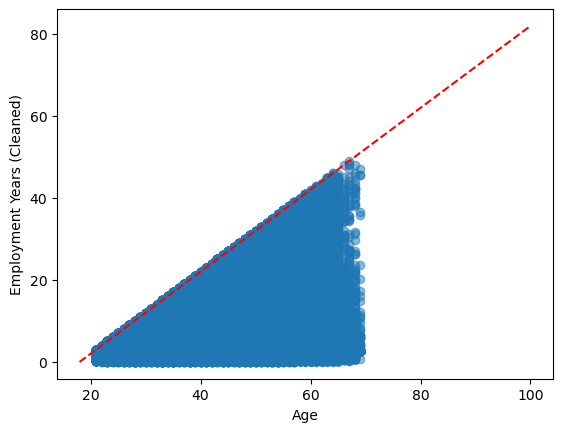

In [35]:
# Check remaining outliers
outliers_remaining = (df_cleaned['EMPLOYMENT_YEARS_CLEANED'] > 
                     df_cleaned['MAX_PLAUSIBLE_EMPLOYMENT']).sum()
print(f"Remaining outliers after cleaning: {outliers_remaining}")

# Visual inspection
import matplotlib.pyplot as plt
plt.scatter(df_cleaned['AGE'], df_cleaned['EMPLOYMENT_YEARS_CLEANED'], alpha=0.5)
plt.plot([18, 100], [0, 82], 'r--')  # Red line: Max plausible (Age - 18)
plt.xlabel('Age')
plt.ylabel('Employment Years (Cleaned)')
plt.show()

In [36]:
df_cleaned.to_excel("cleaned_data.xlsx", index=False, sheet_name='Data')